# Fashion-MNIST

https://github.com/zalandoresearch/fashion-mnist

### 1. 데이터 로드

In [1]:
from torchvision import datasets, transforms

train_dataset = datasets.FashionMNIST(root='./', train=True, download=True)
test_dataset = datasets.FashionMNIST(root='./', train=False, download=True)

100%|██████████| 26.4M/26.4M [00:07<00:00, 3.67MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 102kB/s]
100%|██████████| 4.42M/4.42M [00:02<00:00, 1.52MB/s]
100%|██████████| 5.15k/5.15k [00:00<?, ?B/s]


In [2]:
train_dataset, test_dataset

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: ./
     Split: Train,
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: ./
     Split: Test)

In [4]:
train_dataset.data.shape, test_dataset.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [ ]:
print(train_dataset.data.shape) # 60000개의 이미지 데이터
print(train_dataset[0])         # 이미지 데이터와 레이블
print(train_dataset[0][0])      # 이미지 데이터
print(train_dataset[0][1])      # 레이블
   
print(train_dataset.data[0])    # 0~255 사이의 정수 픽셀 값

torch.Size([60000, 28, 28])
(<PIL.Image.Image image mode=L size=28x28 at 0x19B79D68B00>, 9)
<PIL.Image.Image image mode=L size=28x28 at 0x19B79D68B00>
9
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0

In [14]:
# 직접 전처리
train_images = train_dataset.data.unsqueeze(1) / 255.0 # 정규화 0~1 사이로 변환
train_images = (train_images - 0.5) / 0.5              # 표준화 -1~1 사이로 변환
train_labels = train_dataset.targets.long()

test_images = test_dataset.data.unsqueeze(1) / 255.0 # 정규화 0~1 사이로 변환
test_images = (test_images - 0.5) / 0.5              # 표준화 -1~1 사이로 변환
test_labels = test_dataset.targets.long()

In [12]:
train_images.shape

torch.Size([60000, 1, 28, 28])

In [16]:
! pip install scikit-learn

  Using cached scikit_learn-1.7.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp312-cp312-win_amd64.whl (8.7 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached scipy-1.16.3-cp312-cp312-win_amd64.whl (38.6 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ------------------

In [17]:
# 학습/검증 데이터 분할
from sklearn.model_selection import train_test_split

train_idx, val_idx = train_test_split(range(len(train_images)), test_size=0.15, random_state=42)

tr_images = train_images[train_idx]
tr_labels = train_labels[train_idx]

val_images = train_images[val_idx]
val_labels = train_labels[val_idx]

- 데이터 시각화

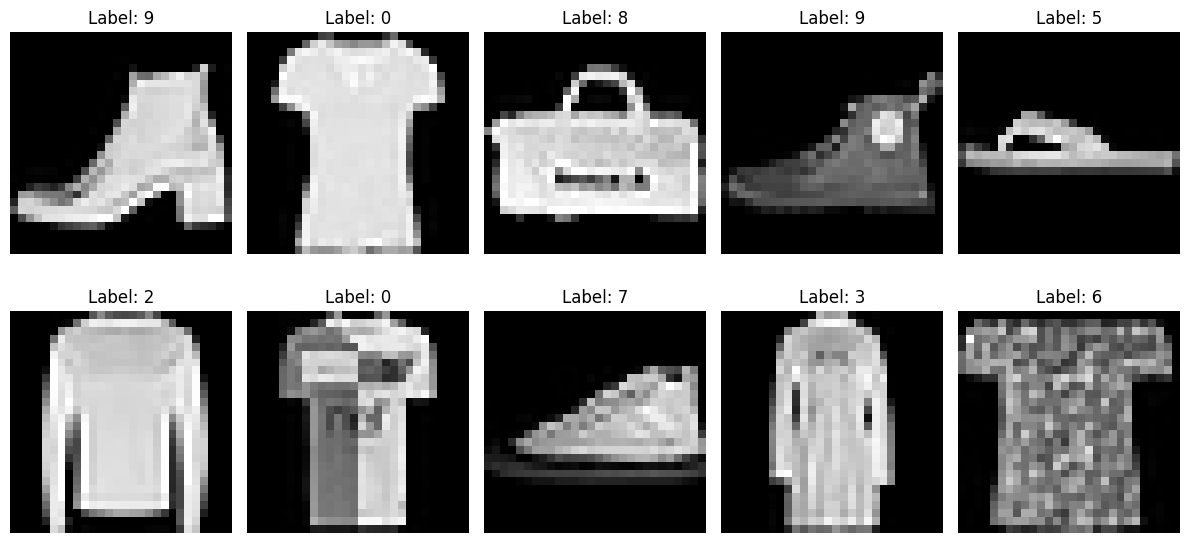

In [19]:
import numpy as np
import matplotlib.pyplot as plt

random_idx = np.random.choice(len(tr_images), 10, replace=False)
random_images = tr_images[random_idx]
random_labels = tr_labels[random_idx]

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(random_images[i].squeeze(), cmap='gray')
    plt.title(f'Label: {random_labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

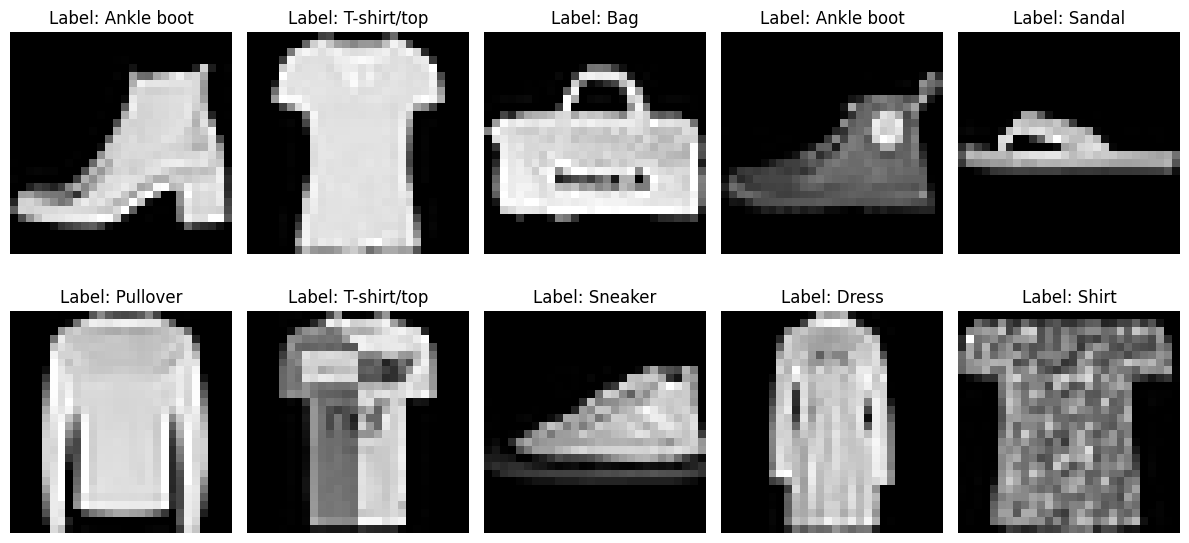

In [23]:
class_name = train_dataset.classes

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)

    img = random_images[i].squeeze()
    plt.imshow(img, cmap='gray')
    plt.title(f'Label: {class_name[random_labels[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

### 2. 모델 생성

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class FashionMNISTCNN(nn.Module):
    def __init__(self):
        super().__init__()
        # 특성 추출
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding='same')
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding='valid')
        self.pool = nn.MaxPool2d(2, 2)

        # 완전 연결 네트워크
        self.flatten = nn.Flatten()
        self.dropout1 = nn.Dropout(0.3)
        self.fc1 = nn.Linear(64*13*13, 100)
        self.dropout2 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        x = self.flatten(x)
        x = self.dropout1(x)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        return self.fc2(x)

model = FashionMNISTCNN()
model

FashionMNISTCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=valid)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=10816, out_features=100, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

In [34]:
from torchsummary import summary
# model = model.cuda() # GPU 사용 → GPU 사용시 설정
summary(model, (1, 28, 28), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 26, 26]          18,496
         MaxPool2d-3           [-1, 64, 13, 13]               0
           Flatten-4                [-1, 10816]               0
           Dropout-5                [-1, 10816]               0
            Linear-6                  [-1, 100]       1,081,700
           Dropout-7                  [-1, 100]               0
            Linear-8                   [-1, 10]           1,010
Total params: 1,101,526
Trainable params: 1,101,526
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.77
Params size (MB): 4.20
Estimated Total Size (MB): 4.98
----------------------------------------------------------------


### 3. 모델 학습

In [35]:
from torch.utils.data import TensorDataset, DataLoader

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

batch_size = 128
train_dataset = TensorDataset(tr_images, tr_labels)
val_dataset = TensorDataset(val_images, val_labels)
test_dataset = TensorDataset(test_images, test_labels)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [37]:
history = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': []
}

epochs = 30

for epoch in range(epochs):
    # 학습 모드
    model.train()
    train_loss = 0.0
    train_total = 0
    train_correct = 0
    
    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.detach().cpu().item()
        _, pred = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (pred == labels).sum().detach().cpu().item()

    # 검증
    model.eval()
    val_loss = 0.0
    val_total = 0
    val_correct = 0

    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(val_loader):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            # loss.backward()
            # optimizer.step()

            val_loss += loss.detach().cpu().item()
            _, pred = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (pred == labels).sum().detach().cpu().item()
    
    # 학습 결과 기록
    train_loss /= len(train_loader)
    val_loss /= len(val_loader)
    train_acc = train_correct / train_total
    val_acc = val_correct / val_total

    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)

    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1}/{epochs}, "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

print("학습 완료")


        

Epoch 5/30, Train Loss: 0.1782, Train Acc: 0.9342, Val Loss: 0.2259, Val Acc: 0.9188
Epoch 10/30, Train Loss: 0.1076, Train Acc: 0.9588, Val Loss: 0.2249, Val Acc: 0.9234
Epoch 15/30, Train Loss: 0.0722, Train Acc: 0.9724, Val Loss: 0.2663, Val Acc: 0.9232
Epoch 20/30, Train Loss: 0.0566, Train Acc: 0.9787, Val Loss: 0.2731, Val Acc: 0.9293
Epoch 25/30, Train Loss: 0.0439, Train Acc: 0.9832, Val Loss: 0.3056, Val Acc: 0.9281
Epoch 30/30, Train Loss: 0.0406, Train Acc: 0.9853, Val Loss: 0.3500, Val Acc: 0.9264
학습 완료


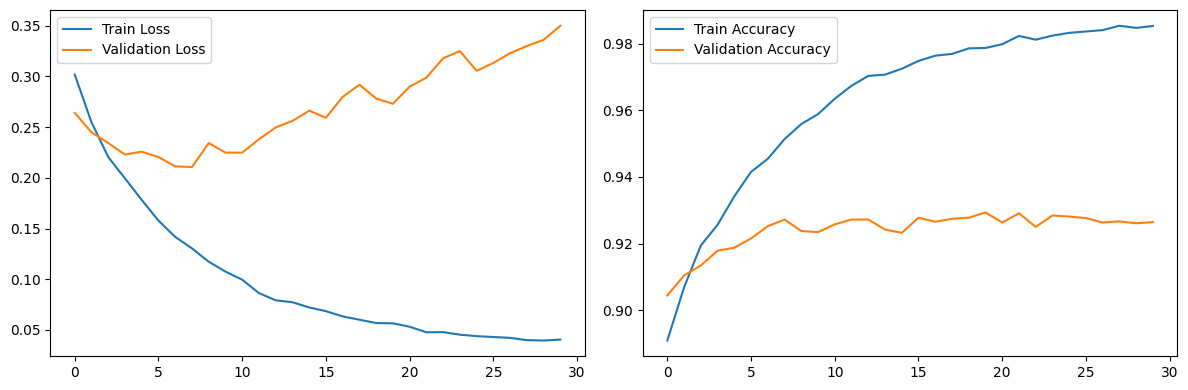

In [38]:
# 학습 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### 4. 모델 평가

In [39]:
model.eval()
test_loss = 0.0
test_total = 0
test_correct = 0

with torch.no_grad():
    for batch_idx, (images, labels) in enumerate(test_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        test_loss += loss.detach().cpu().item()
        _, pred = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (pred == labels).sum().detach().cpu().item()

test_loss /= len(test_loader)
test_acc = test_correct / test_total

print(f"Test 결과> Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


Test 결과> Test Loss: 0.3592, Test Accuracy: 0.9247


### 5. 특성맵 시각화

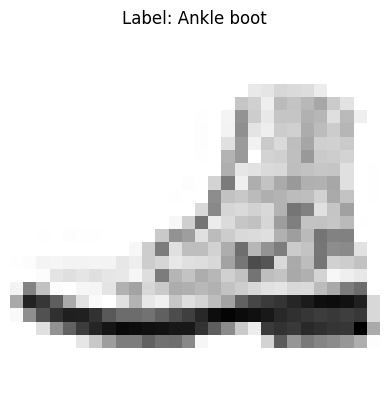

In [ ]:
sample_image = tr_images[1].squeeze()             #  ch, h, w → h, w (28, 28) 형태로 변환
plt.imshow(sample_image, cmap='gray_r')
plt.axis('off')
plt.title(f'Label: {class_name[tr_labels[1]]}')
plt.show()

In [41]:
class FeatureExtractor:
  def __init__(self, model, layer_name):
    self.model = model
    self.layer_name = layer_name
    self.features = None

    layer = dict(model.named_modules())[layer_name]
    layer.register_forward_hook(self.hook)

  def hook(self, module, input, output):
    self.features = output

  def get_features(self, x):
    self.model.eval()
    with torch.no_grad():
      _ = self.model(x)
    return self.features

torch.Size([1, 32, 28, 28])


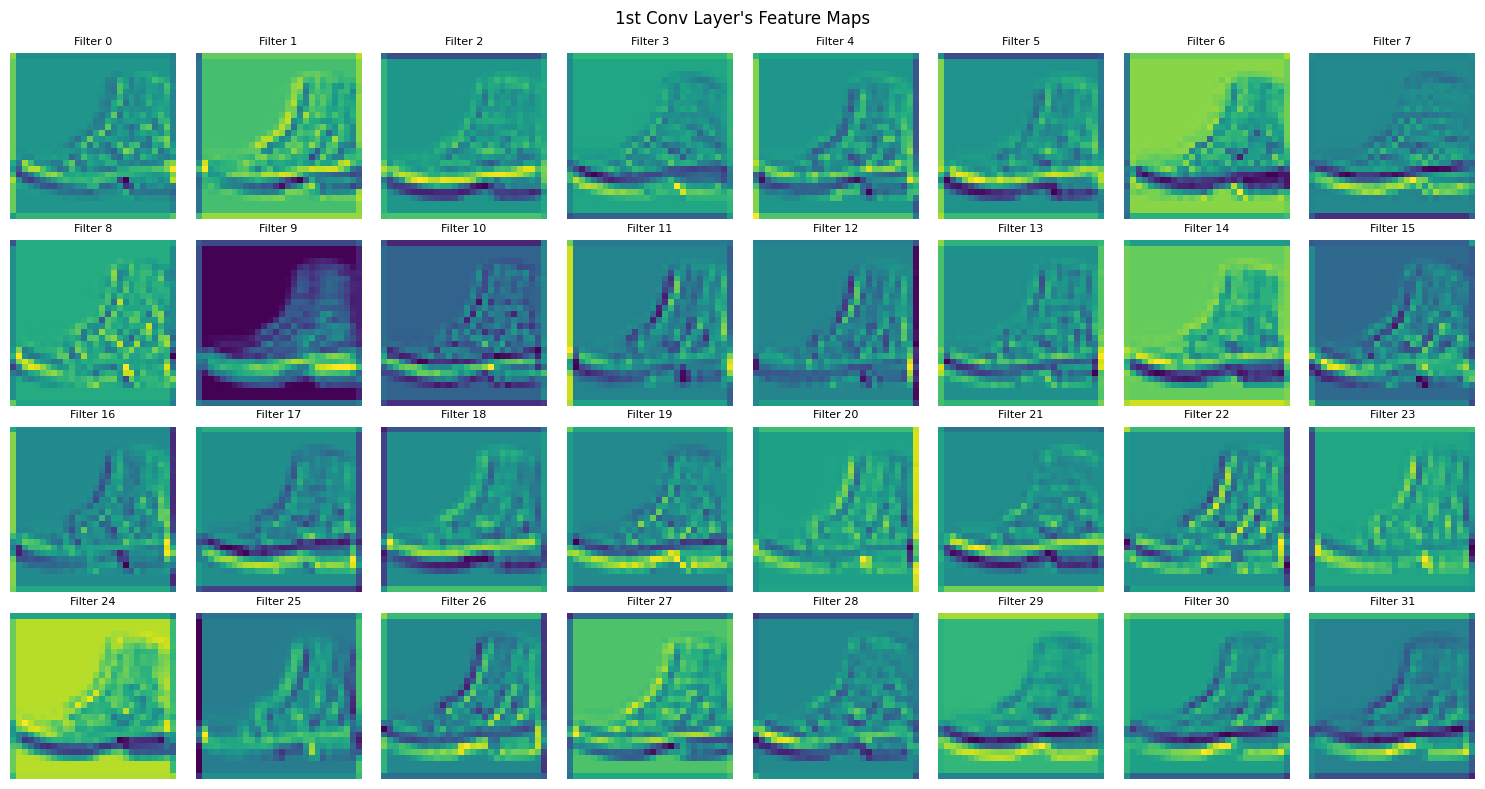

In [42]:
inputs = tr_images[1:2].to(device)

conv1_extractor = FeatureExtractor(model, "conv1")
feature_maps = conv1_extractor.get_features(inputs)
print(feature_maps.shape)

feature_maps_np = feature_maps.cpu().numpy()

fig, axs = plt.subplots(4, 8, figsize=(15, 8))

for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps_np[0, i * 8 + j, :, :], cmap="viridis")
    axs[i, j].axis("off")
    axs[i, j].set_title(f"Filter {i * 8 + j}", fontsize=8)

plt.suptitle("1st Conv Layer's Feature Maps")
plt.tight_layout()
plt.show()

torch.Size([1, 64, 26, 26])


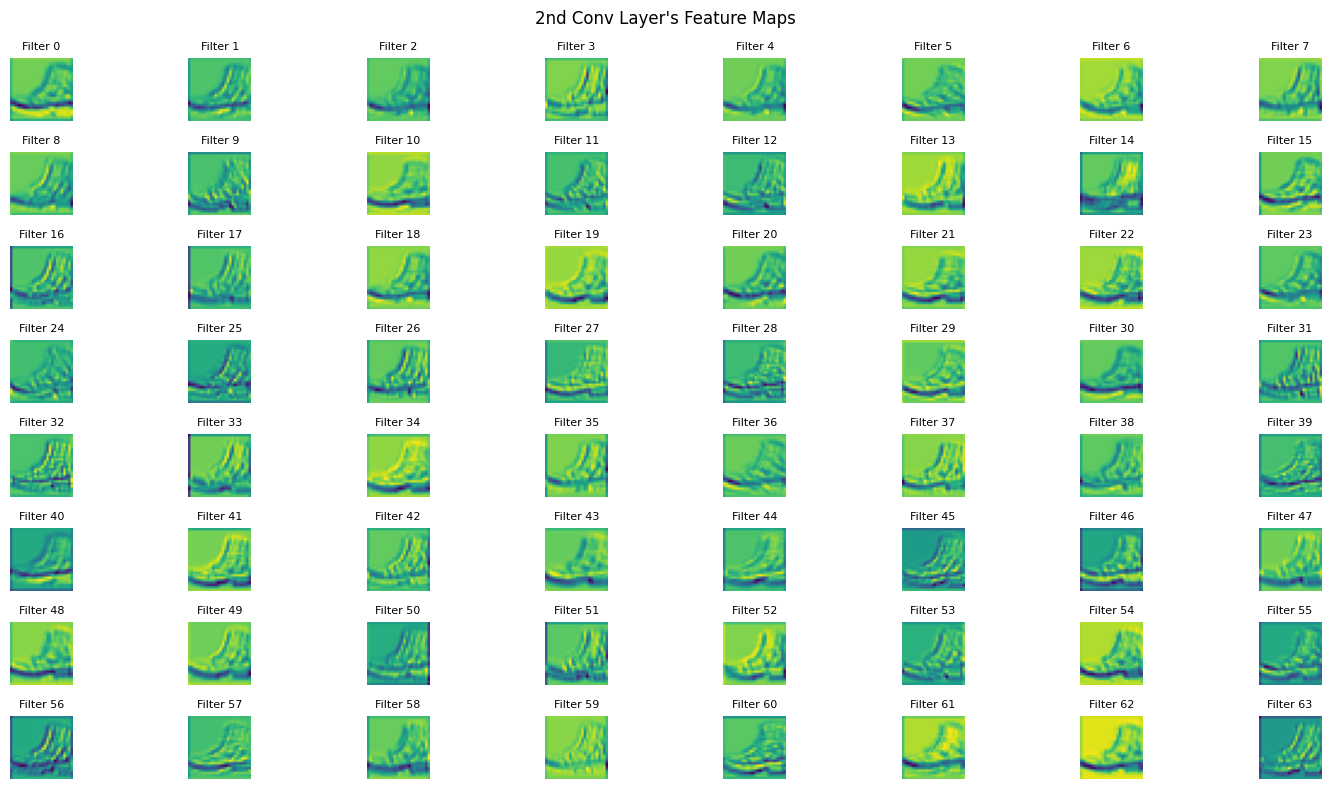

In [43]:
inputs = tr_images[1:2].to(device)

conv2_extractor = FeatureExtractor(model, "conv2")
feature_maps = conv2_extractor.get_features(inputs)
print(feature_maps.shape)

feature_maps_np = feature_maps.cpu().numpy()

fig, axs = plt.subplots(8, 8, figsize=(15, 8))

for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps_np[0, i * 8 + j, :, :], cmap="viridis")
    axs[i, j].axis("off")
    axs[i, j].set_title(f"Filter {i * 8 + j}", fontsize=8)

plt.suptitle("2nd Conv Layer's Feature Maps")
plt.tight_layout()
plt.show()